# **Exercício 09 - PCA**

Aluno: Giovanni Martins de Sá Júnior - 2017001850

Dada a base de dados Olivetti, foi implementado um classificador Bayesiano multivariado, no qual a técnica de PCA irá reduzir a dimensionalidade da base de dados. Nesse sentido, foram feitas variações acerca do percentual da base de dados seria definido para treinamento e teste, afim de obter a proporção no qual o modelo apresentaria a melhor precisão. Com isso, será montada uma tabela contendo a acurácia e o desvio padrão para um dado percentual de dados de teste. Por último é mostrado o gráfico resultante dos autovetores.

Como pode ser visto foi observado uma diminuição gradual na taxa de acerto do modelo uma vez que aumentava-se o tamanho do conjunto de teste (e consequentemente, diminuia o conjunto de treinamento). Tal fato comprova que o modelo acaba não tendo dados suficientes para aprender os padrões, que resulta em um desempenho pior.

Além disso, a diminuição do conjunto de treinamento afeta diretamente na capacidade do modelo a se adaptar a diferentes informações, tornando-o menos robusto e mais suscetível ao Overfitting.

In [1]:
# Importação de Bibliotecas:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregamento da base de Dados Olivetti
olivetti = fetch_olivetti_faces(shuffle=True, random_state=42)
X, y = olivetti.data, olivetti.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
# Definindo as proporções de treinamento e teste
proporcoes_teste = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Número de repetições
num_repeticoes = 10

resultados = []

for proporcao_teste in proporcoes_teste:
    acuracias = []

    for _ in range(num_repeticoes):
        # Separacao os dados em treinamento e teste
        X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=proporcao_teste, random_state=None, shuffle=True)

        # Redução de dimensionalidade usando PCA
        pca = PCA(n_components=0.95)  # Escolhendo a variância e 95%
        X_treino_pca = pca.fit_transform(X_treino)
        X_teste_pca = pca.transform(X_teste)

        # Treinando o classificador Bayesiano
        modelo = GaussianNB()
        modelo.fit(X_treino_pca, y_treino)

        # Realizando previsões
        y_pred = modelo.predict(X_teste_pca)

        # Calculando a acurácia
        acuracia = accuracy_score(y_teste, y_pred)
        acuracias.append(acuracia)

    # Calculando a média e desvio padrão da acurácia para esta proporção de teste
    media_acuracias = np.mean(acuracias)
    desvio_padrao_acuracias = np.std(acuracias)

    # Salvando os resultados
    resultados.append({
        'Proporção de Teste': proporcao_teste,
        'Média de Acurácia': media_acuracias,
        'Desvio Padrão da Acurácia': desvio_padrao_acuracias,
        'Dimensões Escolhidas': pca.n_components_,
        'Motivo da Escolha': '95% de variância explicada'
    })

In [4]:
# Criando um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

In [5]:
# Exibindo a tabela de resultados
print(df_resultados)

   Proporção de Teste  Média de Acurácia  Desvio Padrão da Acurácia  \
0                 0.2           0.787500                   0.045069   
1                 0.3           0.783333                   0.047726   
2                 0.4           0.656250                   0.044896   
3                 0.5           0.555000                   0.029069   
4                 0.6           0.404583                   0.042795   
5                 0.7           0.299286                   0.031004   
6                 0.8           0.150938                   0.030235   

   Dimensões Escolhidas           Motivo da Escolha  
0                   109  95% de variância explicada  
1                   101  95% de variância explicada  
2                    93  95% de variância explicada  
3                    86  95% de variância explicada  
4                    76  95% de variância explicada  
5                    61  95% de variância explicada  
6                    47  95% de variância explicada  

In [6]:
# Grafico dos autovalores
pca = PCA()
pca.fit(X)
autovalores = pca.explained_variance_

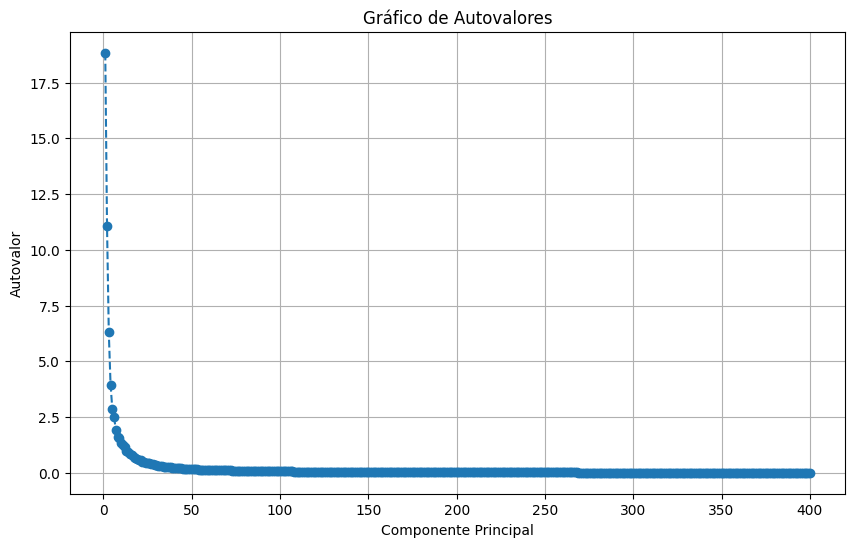

In [7]:
# Plotando o gráfico de autovalores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(autovalores) + 1), autovalores, marker='o', linestyle='--')
plt.title('Gráfico de Autovalores')
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.grid(True)
plt.show()